# Mentoría DiploDatos 2025 - Segmentación Inteligente de Clientes en Telecomunicaciones


### Introduccion

El proyecto consiste en desarrollar un modelo de segmentación de clientes para una empresa del sector de telecomunicaciones, con el objetivo de identificar patrones de comportamiento y definir estrategias de acción personalizadas para cada grupo, generando así valor comercial y fortaleciendo la toma de decisiones de negocio.

Este proyecto pone en evidencia el valor de la clusterización y el uso de modelos no supervisados como herramientas clave para conocer en profundidad las características de los clientes. A partir de los segmentos identificados, es posible proyectar acciones concretas orientadas a mejorar la fidelización, impulsar ventas cruzadas y desarrollar estrategias efectivas de retención.

Es fundamental recordar que no todos los clientes son iguales, y que al aprovechar los datos de manera inteligente, podemos ofrecerles una experiencia más personalizada, relevante y satisfactoria.

### Inicializacion del entorno

In [1]:
!pip install pandas 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install plotly


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install scipy


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install sqlalchemy


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install cx_Oracle


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Importación de librerías
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

import itertools
import warnings
warnings.filterwarnings("ignore")
import io

# Para visualización
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from plotly.figure_factory import create_table
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de aprendizaje automático
from sklearn.cluster import KMeans, MeanShift, DBSCAN 
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance

# Librerías estadísticas y matemáticas
from scipy.stats import t
from scipy import stats
from math import pi

In [10]:
#Carga de datos
df = pd.read_csv("Segmentacion_Clientes.csv", sep=";")
print(df.head())

                  RAZON_SOCIAL  REGION_OTROS  REGION_CF  REGION_BSAS  \
0              AVANZ TRUCK SRL             1          0            0   
1             COOLMEALS S.A.S.             0          0            0   
2             GRUPO QUEST S.A.             0          0            0   
3  3NTROPY TECHNOLOGIES S.R.L.             0          1            0   
4                    48M2 S.A.             0          1            0   

   REGION_DESCONOCIDO  REGION_CBA  PROD_DATOS_RPV  PROD_INTER_DEDICADO  \
0                   0           0               0                    1   
1                   0           1               0                    1   
2                   0           1               1                    1   
3                   0           0               0                    1   
4                   0           0               0                    1   

   PROD_DATOS_ENLACE  PROD_DATOS_LAN_TO_LAN  PROD_SD_WAN  MERC_OTROS  \
0                  0                      0       

### Detalle del dataset por feature:
- RAZON_SOCIAL: Denominación del Cliente Corporativo
- REGION_CF: Si el cliente está ubicado en Capital Federal es un 1, caso contrario 0.
- REGION_BSAS: Si el cliente está ubicado en Bs. As es un 1, caso contrario 0.
- REGION_CBA: Si el cliente está ubicado en Córdoba es un 1, caso contrario 0.
- REGION_DESCONOCIDO: Clientes cuyo campo de Ubicación está vacío. Se arma esta variable para que no haya nulos.
- REGION_OTROS: Incluye las localidades que no están en las demas regiones (por ejemplo clientes localizados en Misiones tendrán un 1 en este campo)
- PROD_DATOS_RPV: Clientes que tienen contratado el servicio de RPV(Red Privada Virtual). Esta es una solución de telecomunicaciones que permite interconectar distintas sedes de una empresa a través de una red privada y segura, utilizando la infraestructura de un proveedor (como una operadora de telecomunicaciones).
- PROD_INTER_DEDICADO: Clientes que tienen contratado el servicio de Internet dedicado.Este consiste en en brindar una conexión exclusiva y simétrica a internet con ancho de banda garantizado para una empresa. 
- PROD_DATOS_ENLACE: Clientes que tienen contratado el servicio de enlace.Enlace es una conexión punto a punto que une físicamente dos ubicaciones para transmitir datos directamente.
- PROD_DATOS_LAN_TO_LAN:Clientes que tienen contratado el servicio de lan to lan. Esto permite interconectar dos o más redes locales (LAN) de distintas sedes mediante enlaces privados y seguros.
- PROD_SD_WAN:Clientes que tienen contratado el servicio de SD WAN. Esta es una tecnología que gestiona de forma inteligente múltiples conexiones de red (como MPLS, internet o 4G) para optimizar el rendimiento y la seguridad del tráfico entre sedes.
- MERC_CORPORATIVO: Indica con 1 si el cliente es del segmento corporativo y 0 caso contrario.
- MERC_EMPRESAS: Indica con 1 si el cliente es del segmento Empresas y 0 caso contrario.
- MERC_GRANDES_CLIENTES: Indica con 1 si el cliente es del segmento Grandes Clientes y 0 caso contrario.
- MERC_PYMES: Indica con 1 si el cliente es del segmento Pymes y 0 caso contrario.
- MERC_OTROS: Indica con 1 si el cliente es de un segmento diferente a los anteriores y 0 caso contrario.
- CANT_PRODUCTOS: Contabiliza la cantidad de productos de cada cliente.
- CANT_ENLACES: Contabiliza la cantidad de enlaces de cada cliente. Los clientes pueden tener mas de un enlace y más de un producto.
- FACTURACION_ARS: Indica lo que paga en pesos el cliente de acuerdo a la cantidad de enlaces
- DURACION_CLIENTE_DIAS: Indica la cantidad de días transcurridos desde que el cliente adquirió un producto. 
- INCIDENTES: Contabiliza la cantidad de reclamos del cliente debido a incidentes en un enlace.
- TMR: El Tiempo medio de respuesta indica cuantas horas pasaron desde que se reportó el incidente hasta que se resuelve.

#### Trabajo practico 3: Implementación de Modelos de ML para Aprendizaje No supervisado 
En esta etapa vamos a probar diferentes modelos de ML para clusterizar los clientes como el KMeans y DBSCAN, que buscan agrupamientos naturales en los datos según sus similitudes revelando patrones no evidentes. Se evaluaran los modelos considerando su desempeño tanto con reduccion como sin reducción de dimensionalidad mediante PCA.

Antes de aplicar el modelo K-Means, se utiliza el método del codo y el coeficiente de silueta para determinar el número óptimo de clusters. El método del codo permitió analizar la inercia dentro de los clusters, mientras que el coeficiente de silueta evaluó tanto la cohesión interna como la separación entre los puntos, facilitando la elección del mejor agrupamiento. DBSCAN no requiere especificar el número de clusters, pero si definir dos hiperparámetros:Epsilon que indica el radio dentro del cual los puntos son considerados vecinos y min_samples  que indica el mínimo nro. de puntos para formar un cluster. En este modelo también nos apoyamos en el coeficiente de silueta para evaluar la calidad de los agrupamientos.

##### Cuestiones a analizar y responder:
1. **¿Cuál es el número óptimo de clusters previo a aplicar KMEANS?**

2. **¿Cuáles son los mejores valores de hiperparámetros en DBSCAN?**

3. **¿Qué resultados se observan en KMEANS con y sin PCA en base al coeficiente de silueta?**

4. **¿Qué resultados de ruido y clusters se observan en DBSCAN con y sin PCA en base al coeficiente de silueta?¿Cómo se podría mejorar?**

5. **Qué modelo le parece más adecuado para este dataset y como podría mejorarse?**

6. **¿Qué estrategias podría aplicar en cada cluster de acuerdo a las características observadas?**


#### Clustering con Kmeans sin PCA

Una forma de seleccionar la cantidad más adecuada de clusters es probar varias cantidades y usar el criterio del codo: "elbow method", utilizando una medida de ajuste que puede ser Inertia. Vemos en el valor de clusters donde dobla la gráfica sería el valor indicado.

In [18]:
#Considerar solo las columnas numéricas para escalar
columnas = np.r_[1:22]  # Esto va desde el índice 1 hasta el 21 inclusive
df_numeric = df.iloc[:, columnas]
# Reemplazar ',' por '.' y convertir a float
df_numeric = df_numeric.apply(lambda col: col.str.replace(',', '.', regex=False) if col.dtypes == 'object' else col)
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')
# Estandarización de los datos
std_scaler = StandardScaler()
standard = std_scaler.fit_transform(df_numeric)
df_escalado=pd.DataFrame(standard,columns=df_numeric.columns)

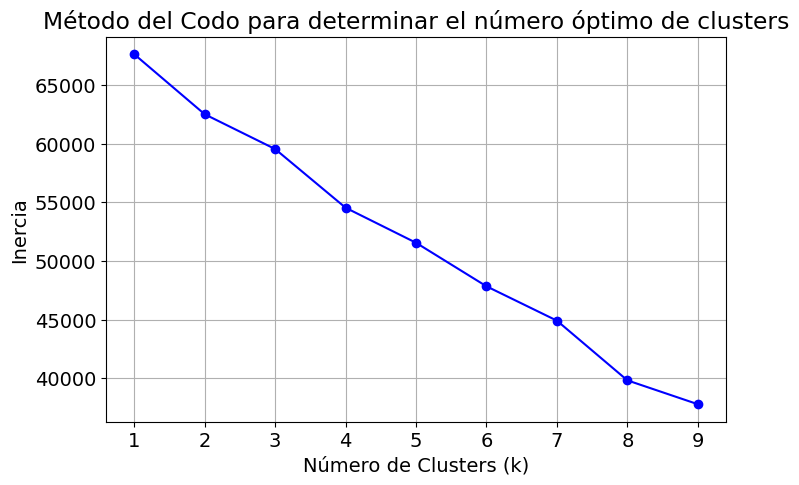

In [19]:
##CODO
# Lista para almacenar la inercia para cada valor de k
inertia = []
k_values = range(1, 10)
# Calcular la inercia para cada número de clusters (k) de 1 a 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_escalado)
    inertia.append(kmeans.inertia_)
    
#Graficar la inercia en función del número de clusters 
plt.rcParams.update({'font.size': 14})  
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-', marker='o', color='b')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
#KMEANS
km = KMeans(n_clusters=5, random_state=42) #definimos clusters y semilla
km.fit(df_escalado) 

KMeans(n_clusters=5, random_state=42)

In [21]:
#Coeficiente de Silueta
sil_score = silhouette_score(df_escalado, km.labels_)
sil_score

np.float64(0.1739992840211705)

In [22]:
# Agregamos la columna Cluster
df_escalado_kmeans=df_escalado.copy()
df_escalado_kmeans['Cluster']=km.labels_
df_escalado_kmeans['Cluster'].value_counts()

Cluster
1    1403
0    1144
2     363
4     310
3       1
Name: count, dtype: int64

In [23]:
# Por cada cluster obtenemos las medias
variables_df_escalado = df_escalado.columns
df_escalado_kmeans_medias= df_escalado_kmeans.groupby('Cluster')[variables_df_escalado].mean().reset_index()
df_escalado_kmeans_medias.T

,0,1,2,3,4
Cluster,0.000000,1.000000,2.000000,3.000000,4.000000
REGION_OTROS,-0.229279,0.234239,0.247194,-0.501843,-0.501843
REGION_CF,0.649402,-0.342863,-0.020266,-0.818399,-0.818399
REGION_BSAS,-0.421323,0.471835,-0.001895,1.712555,-0.583923
REGION_DESCONOCIDO,0.262205,-0.169578,0.024957,-0.228627,-0.228627
REGION_CBA,-0.326332,-0.326332,-0.326332,-0.326332,3.064363
PROD_DATOS_RPV,0.061109,-0.043855,-0.048417,22.933424,-0.044316
PROD_INTER_DEDICADO,0.168822,-0.089693,-0.149726,2.631782,-0.050239
PROD_DATOS_ENLACE,0.077295,-0.042187,-0.043449,-0.044341,-0.043296
PROD_DATOS_LAN_TO_LAN,0.039824,-0.046381,-0.053254,52.759024,-0.044885


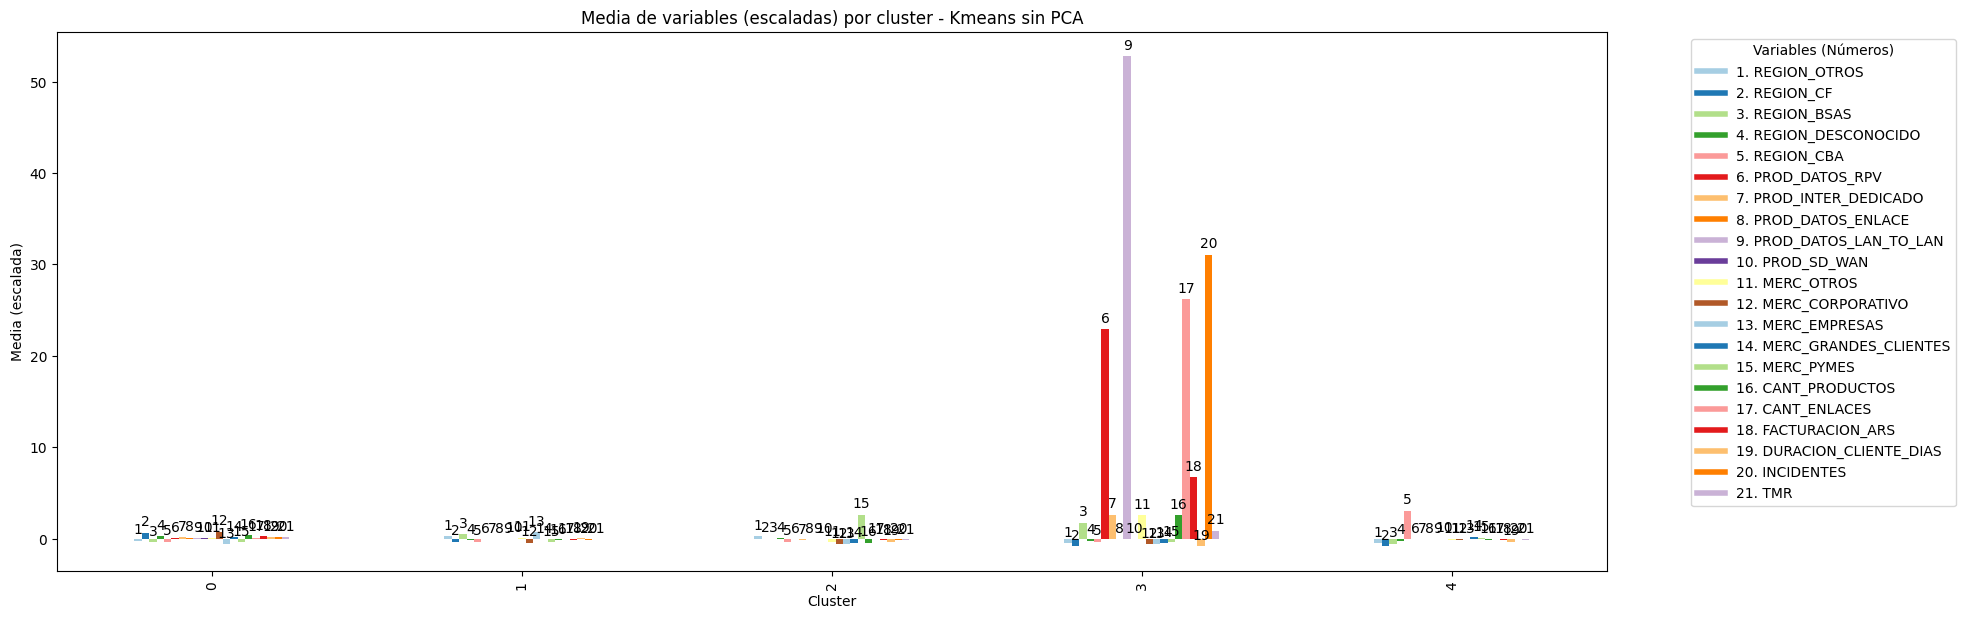

In [24]:
#Gráfico de Barras por Cluster
# Configurar colores personalizados usando Seaborn
num_variables = len(variables_df_escalado)
colors = sns.color_palette("Paired", num_variables)  # Paleta de colores
# Crear una leyenda numerada
numeros_categorias = [f"{i+1}. {var}" for i, var in enumerate(variables_df_escalado)]
# Configurar el tamaño de fuente global
plt.rcParams.update({'font.size': 10})
# Crear la gráfica
fig, ax = plt.subplots(figsize=(20, 7))
df_escalado_kmeans_medias.set_index('Cluster').plot(kind='bar', color=colors, ax=ax)
# Configurar título y etiquetas
plt.title('Media de variables (escaladas) por cluster - Kmeans sin PCA')
plt.xlabel('Cluster')
plt.ylabel('Media (escalada)')

# Asignar las etiquetas correctas para cada barra
for i, (col_name, color) in enumerate(zip(variables_df_escalado, colors)):
    # Filtrar solo las barras de esta columna
    bars = ax.containers[i]
    
    # Agregar etiquetas a cada barra
    for bar in bars:
        # Número de la variable en la leyenda
        numero_categoria = f"{i+1}"
        
        # Etiqueta encima de la barra
        ax.annotate(
            numero_categoria,
            (bar.get_x() + bar.get_width() / 2., bar.get_height()),  # Posición
            ha='center', va='baseline', fontsize=10, color='black', 
            xytext=(0, 5), textcoords='offset points'
        )

# Crear una leyenda numerada
custom_legend = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(num_variables)]
plt.legend(custom_legend, numeros_categorias, title='Variables (Números)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.show()

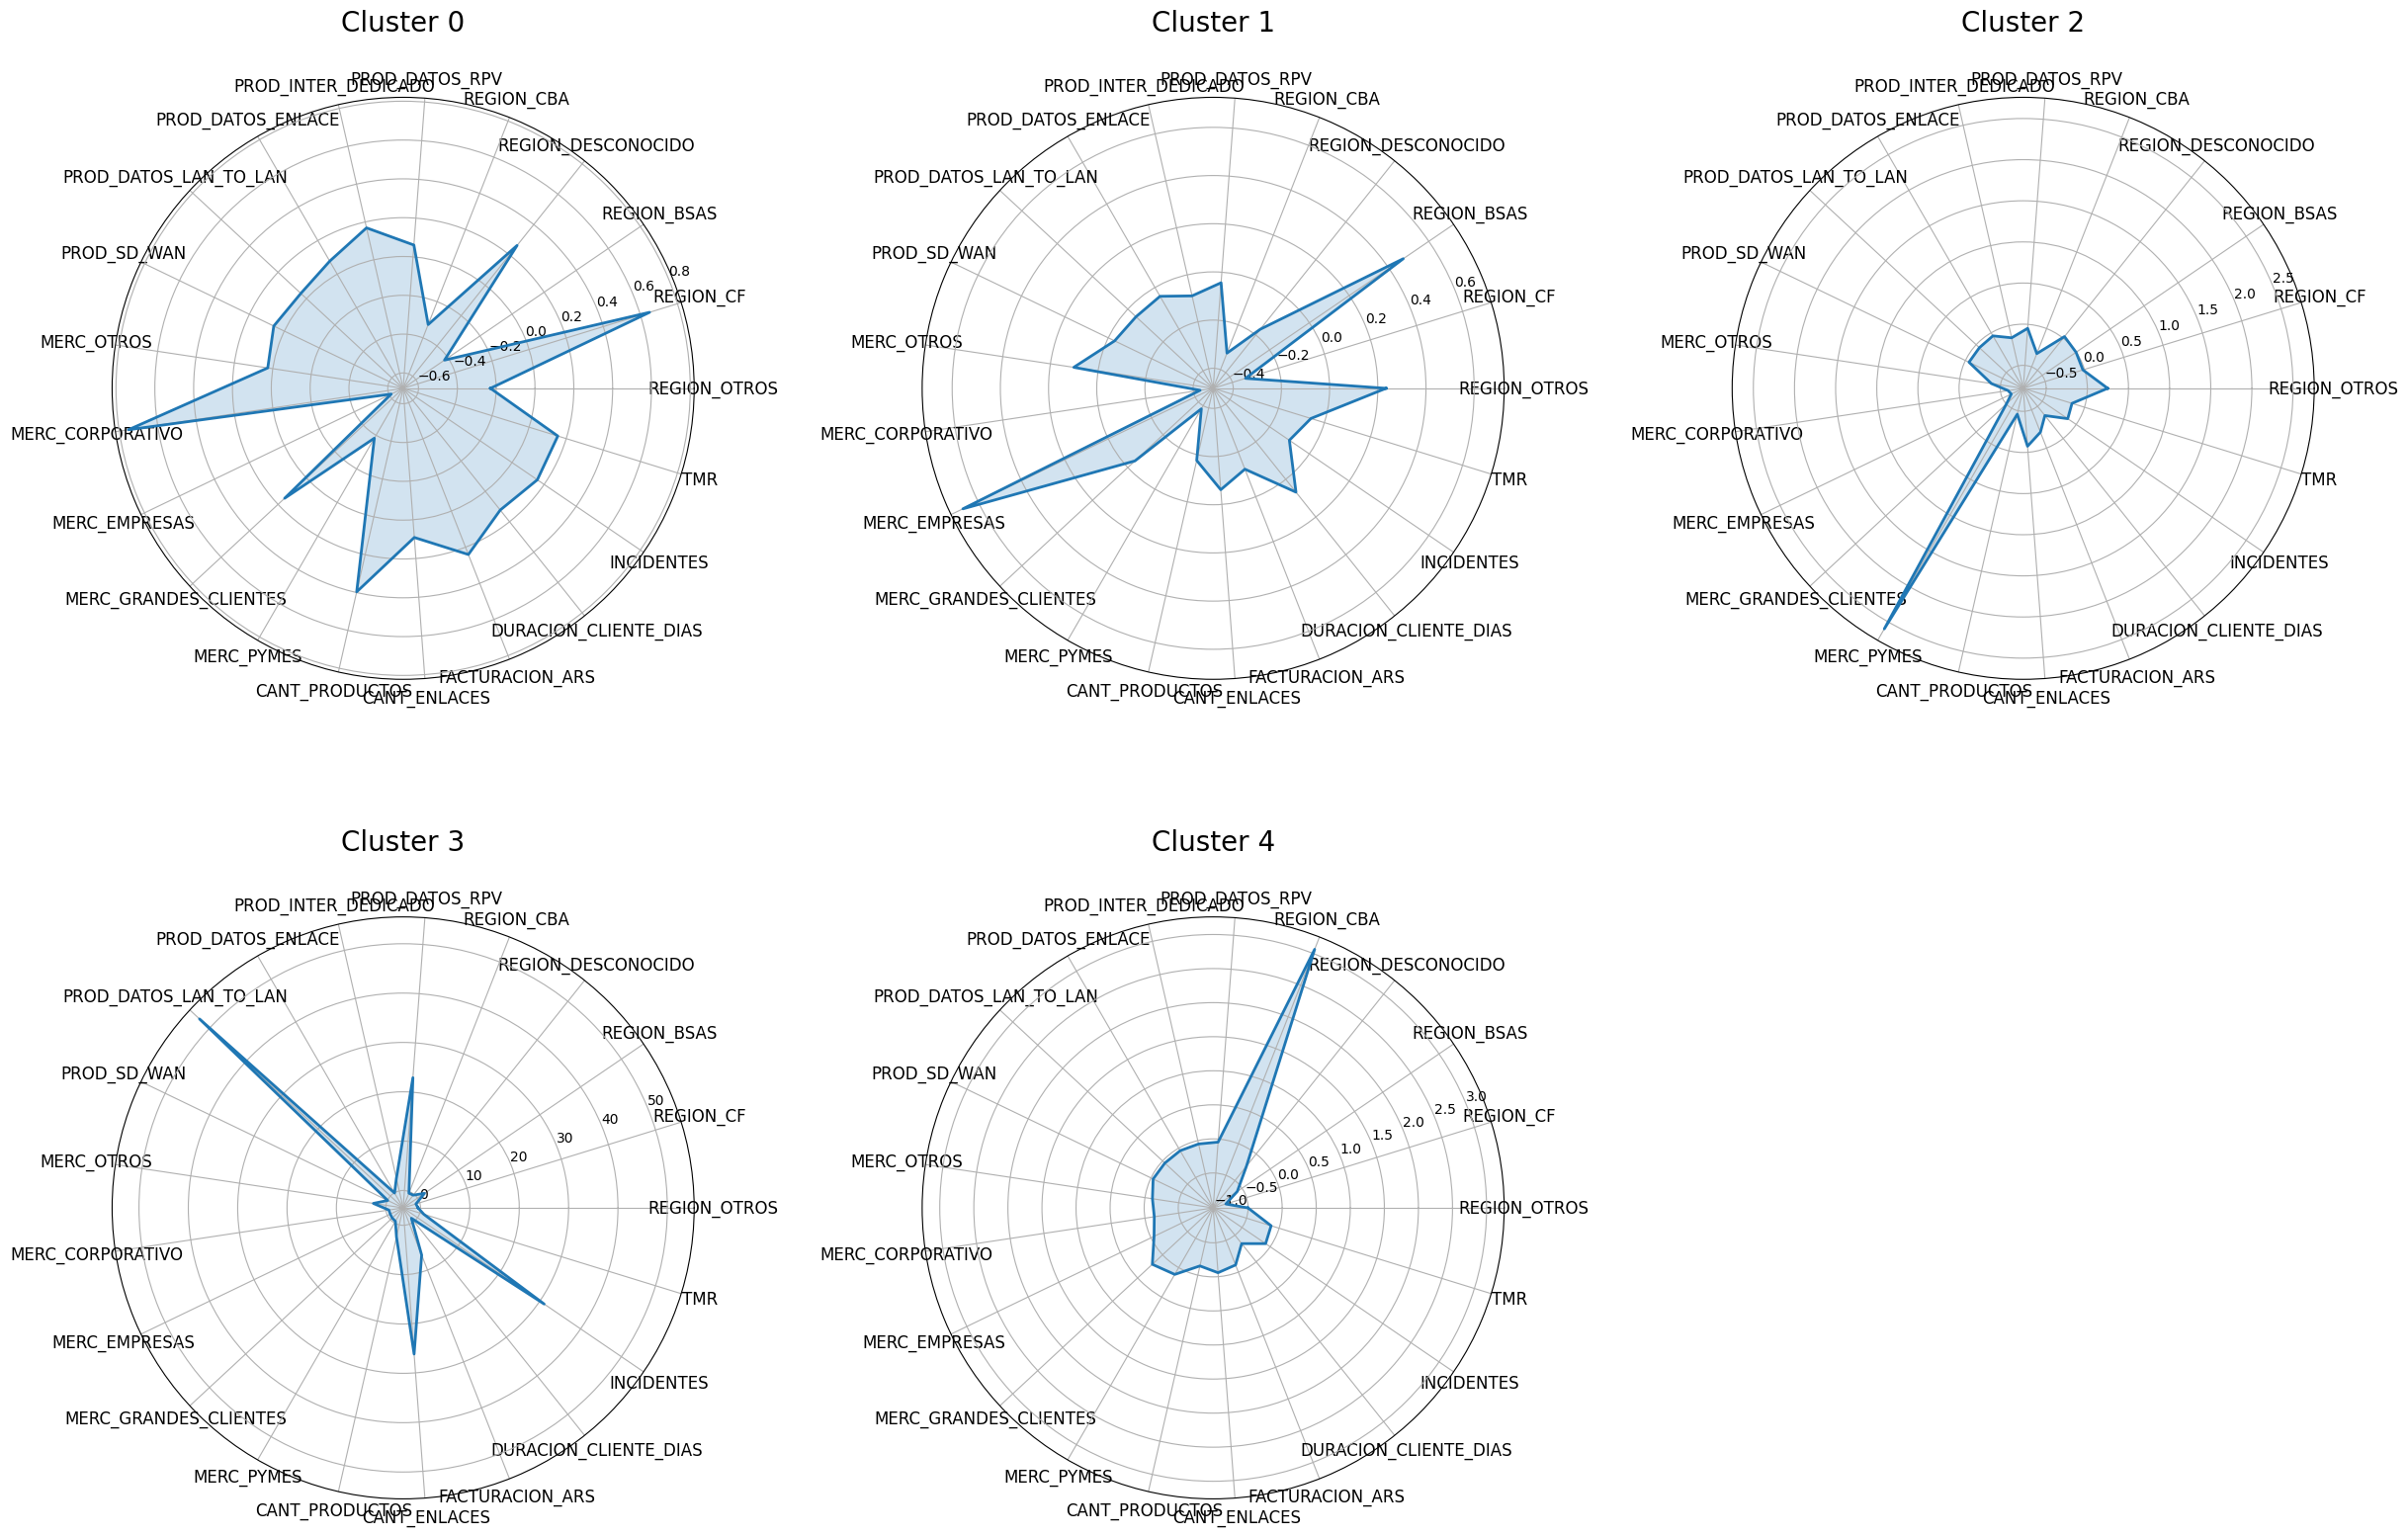

In [25]:
#Gráfico Radar por Cluster
# Preparamos los datos para el radar plot
num_clusters = df_escalado_kmeans_medias['Cluster'].nunique()  # Número de clusters
variables = df_escalado_kmeans_medias.columns[1:]  # Excluyendo la columna 'Cluster'

# Configuración de filas y columnas
num_columns = 3  # Número de gráficos por fila
num_rows = -(-num_clusters // num_columns)  # Calcular el número de filas necesarias

plt.figure(figsize=(25, 17))  # Ajustamos el tamaño de la figura (ancho y alto)

# Configuración de los gráficos
for cluster in range(num_clusters):
    values = df_escalado_kmeans_medias[df_escalado_kmeans_medias['Cluster'] == cluster].iloc[0, 1:].values
    values = list(values) + [values[0]]  # Cerrar el polígono
    angles = [n / float(len(variables)) * 2 * pi for n in range(len(variables))]
    angles += angles[:1]

    # Configuramos el subplot con filas y columnas
    ax = plt.subplot(num_rows, num_columns, cluster + 1, polar=True)  # Ajustar filas y columnas
    plt.xticks(angles[:-1], variables, color='black', size=12)  # Tamaño de letra para etiquetas
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')  # Línea
    ax.fill(angles, values, alpha=0.2)  # Relleno
    plt.title(f'Cluster {cluster}', size=20, color='black', y=1.1)  # Título

# Ajustar el espaciado y mostrar los gráficos
plt.tight_layout(pad=3.0)  # Espaciado entre subplots
plt.show()

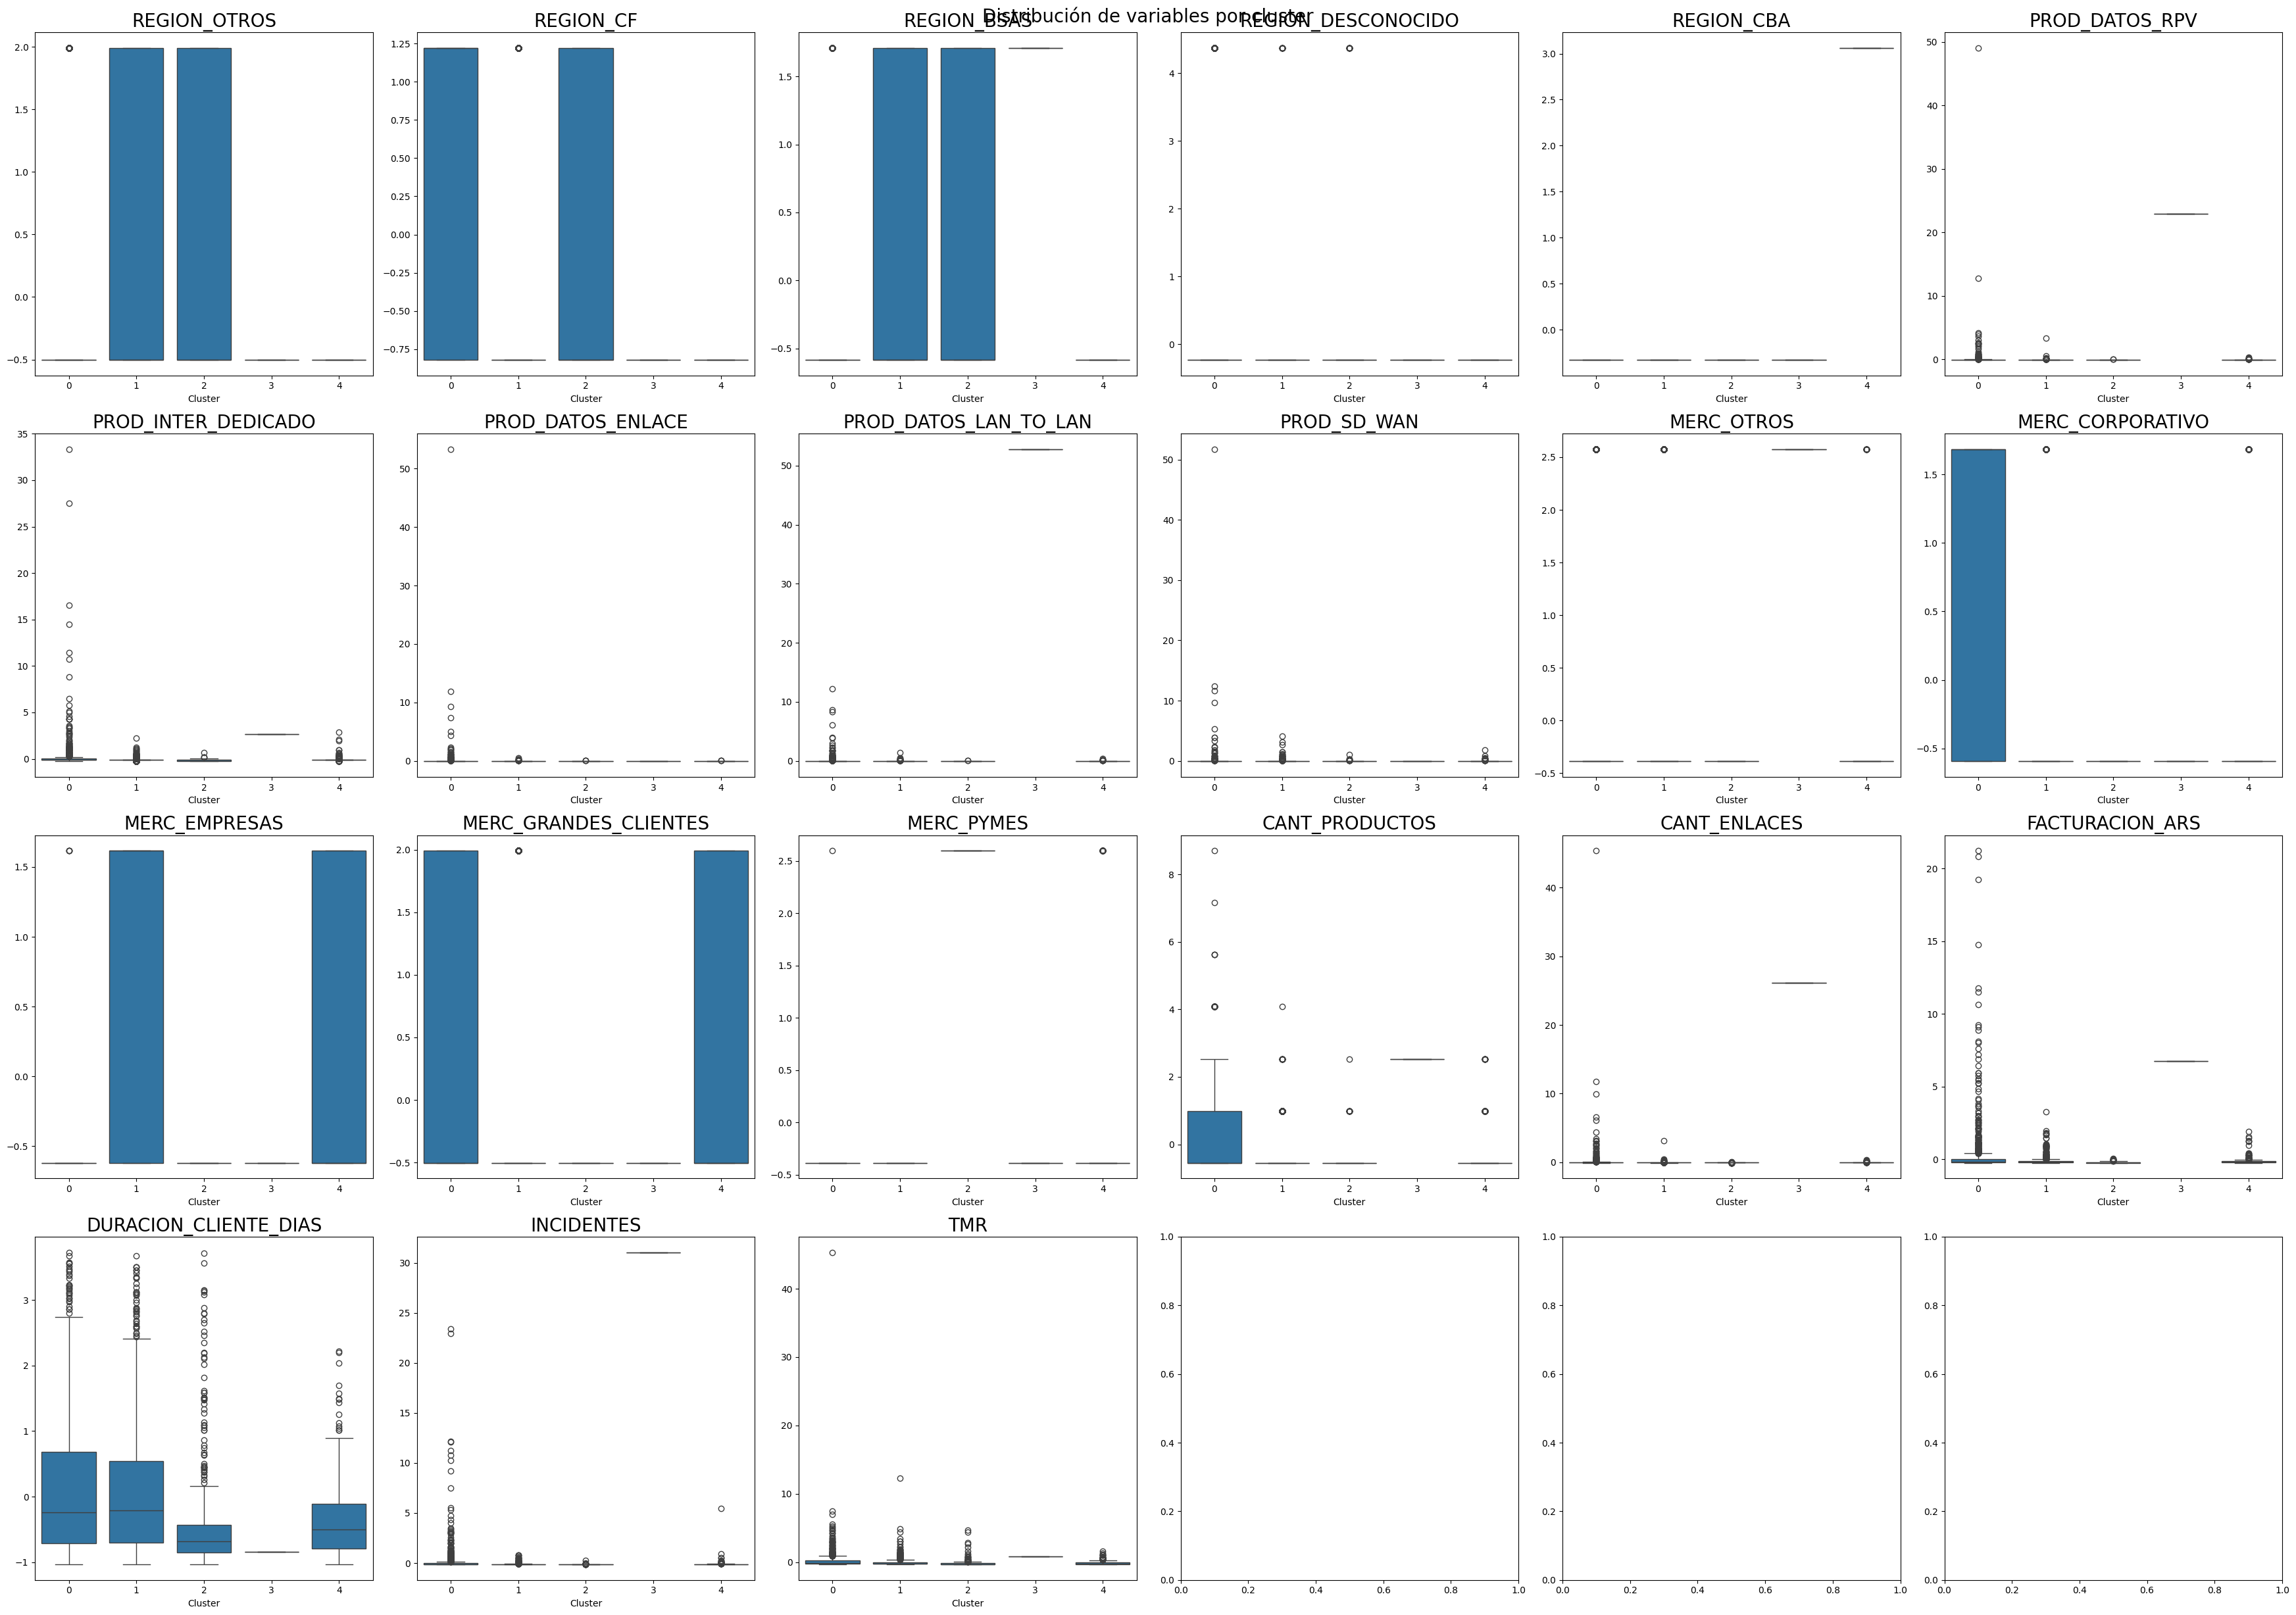

In [26]:
#Gráfico boxplot por Cluster
# Lista de variables de interés
filas = 4  # Número de filas en la cuadrícula
columnas = 6  # Número de columnas en la cuadrícula

# Configuración de la figura y tamaño general
fig, axes = plt.subplots(filas, columnas, figsize=(35, 25))
fig.suptitle('Distribución de variables por cluster', fontsize=20)

# Recorrer las variables y crear un boxplot en cada subplot
for i, variable in enumerate(variables_df_escalado):
    fila = i // columnas
    columna = i % columnas
    
    # Crear boxplot en la posición correspondiente
    sns.boxplot(x='Cluster', y=variable, data=df_escalado_kmeans, ax=axes[fila, columna])
    axes[fila, columna].set_title(variable, fontsize=20)
    axes[fila, columna].set_xlabel('Cluster')
    axes[fila, columna].set_ylabel('')

# Ajustar espacio entre subplots para evitar superposición
plt.tight_layout()  # Ajuste para el título general
plt.show()

#### Clustering con Kmeans con PCA

Al aplicar PCA (Análisis de Componentes Principales) se descomponen las características originales en nuevas variables que son combinaciones lineales de las originales y están ordenadas por la cantidad de varianza que explican. Cuanto la varianza alcanza el 90% aproximadamente se considera que ya tiene información válida del dataset original y ahí vemos la cantidad de variables PCA que tomaremos.
Generamos df_escalado_pca que es el df resultado de aplicar PCA y este dataframe es el que usaremos para enternar el modelo KMEANS.Seguimos los mismos pasos que en el caso anterior ya que solamente cambia el df inicial.

In [27]:
#Varianza
pca = PCA()
pca.fit(df_escalado)
print("Varianza explicada por cada componente (estandarizado):", pca.explained_variance_ratio_.cumsum())

Varianza explicada por cada componente (estandarizado): [0.16386484 0.25245005 0.3250146  0.39388676 0.46078897 0.52178873
 0.58258094 0.63665914 0.68828419 0.7378013  0.78515139 0.82986205
 0.87061456 0.90785942 0.94315005 0.97229053 0.99074131 0.99973325
 0.99996226 1.         1.        ]


In [28]:
#PCA
pca=PCA(n_components=13)
# Transformar los datos y obtener las componentes principales
projected_features_std = pca.fit_transform(df_escalado)

# Crear un DataFrame con las dos primeras componentes principales
df_escalado_pca = pd.DataFrame(projected_features_std)

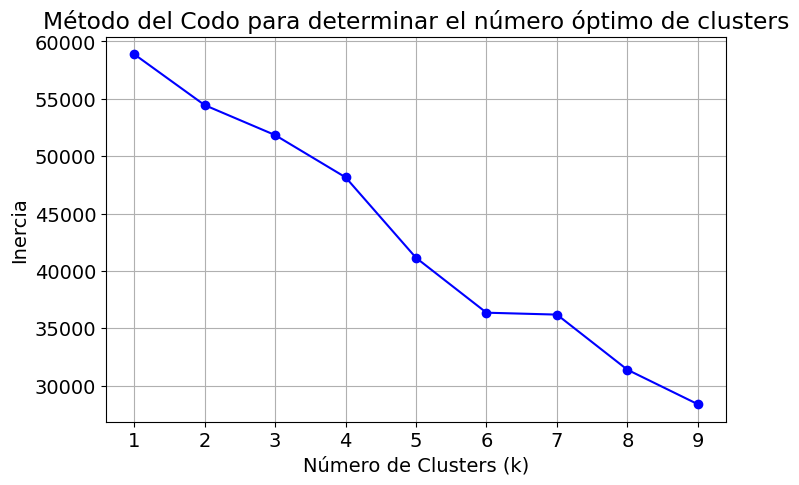

In [29]:
#Codo
# Lista para almacenar la inercia para cada valor de k
inertia = []
k_values = range(1, 10)
# Calcular la inercia para cada número de clusters (k) de 1 a 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_escalado_pca)
    inertia.append(kmeans.inertia_)

# Graficar la inercia en función del número de clusters
plt.rcParams.update({'font.size': 14})  
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-', marker='o', color='b')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [30]:
#KMEANS
km = KMeans(n_clusters=5, random_state=42)
km.fit(df_escalado_pca) 
km.labels_

array([3, 2, 2, ..., 0, 0, 0], dtype=int32)

In [31]:
#Silueta
sil_score= silhouette_score(df_escalado_pca,km.labels_)
sil_score

np.float64(0.19834175327886788)

In [32]:
df_escalado_kmeans_pca=df_escalado.copy()
df_escalado_kmeans_pca['Cluster']=km.labels_
df_escalado_kmeans_pca['Cluster'].value_counts()

Cluster
3    1241
0    1084
1     584
2     310
4       2
Name: count, dtype: int64

In [33]:
# Visualización de estadísticas descriptivas por cluster
variables_df_escalado = df_escalado.columns
# Calcular la media de las variables escaladas por cluster
df_escalado_kmeans_pca_medias = df_escalado_kmeans_pca.groupby('Cluster')[variables_df_escalado].mean().reset_index()

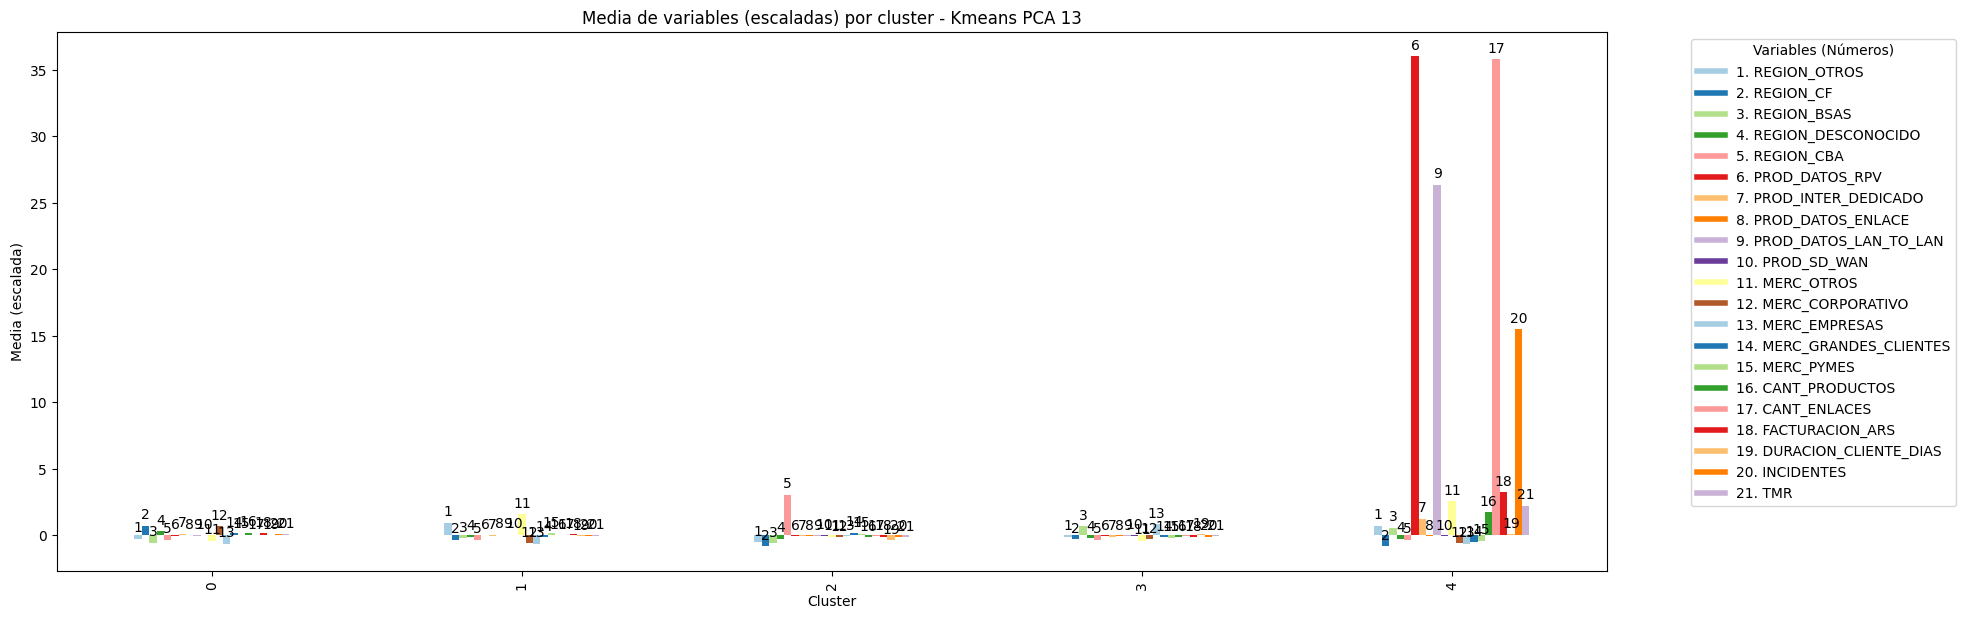

In [34]:
#Gráfico de Barras por Cluster
# Configurar colores personalizados usando Seaborn
num_variables = len(variables_df_escalado)
colors = sns.color_palette("Paired", num_variables)  # Paleta de colores

# Crear una leyenda numerada
numeros_categorias = [f"{i+1}. {var}" for i, var in enumerate(variables_df_escalado)]

# Configurar el tamaño de fuente global
plt.rcParams.update({'font.size': 10})

# Crear la gráfica
fig, ax = plt.subplots(figsize=(20, 7))
df_escalado_kmeans_pca_medias.set_index('Cluster').plot(kind='bar', color=colors, ax=ax)

# Configurar título y etiquetas
plt.title('Media de variables (escaladas) por cluster - Kmeans PCA 13')
plt.xlabel('Cluster')
plt.ylabel('Media (escalada)')

# Asignar las etiquetas correctas para cada barra
for i, (col_name, color) in enumerate(zip(variables_df_escalado, colors)):
    # Filtrar solo las barras de esta columna
    bars = ax.containers[i]
    
    # Agregar etiquetas a cada barra
    for bar in bars:
        # Número de la variable en la leyenda
        numero_categoria = f"{i+1}"
        
        # Etiqueta encima de la barra
        ax.annotate(
            numero_categoria,
            (bar.get_x() + bar.get_width() / 2., bar.get_height()),  # Posición
            ha='center', va='baseline', fontsize=10, color='black', 
            xytext=(0, 5), textcoords='offset points'
        )

# Crear una leyenda numerada
custom_legend = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(num_variables)]
plt.legend(custom_legend, numeros_categorias, title='Variables (Números)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.show()

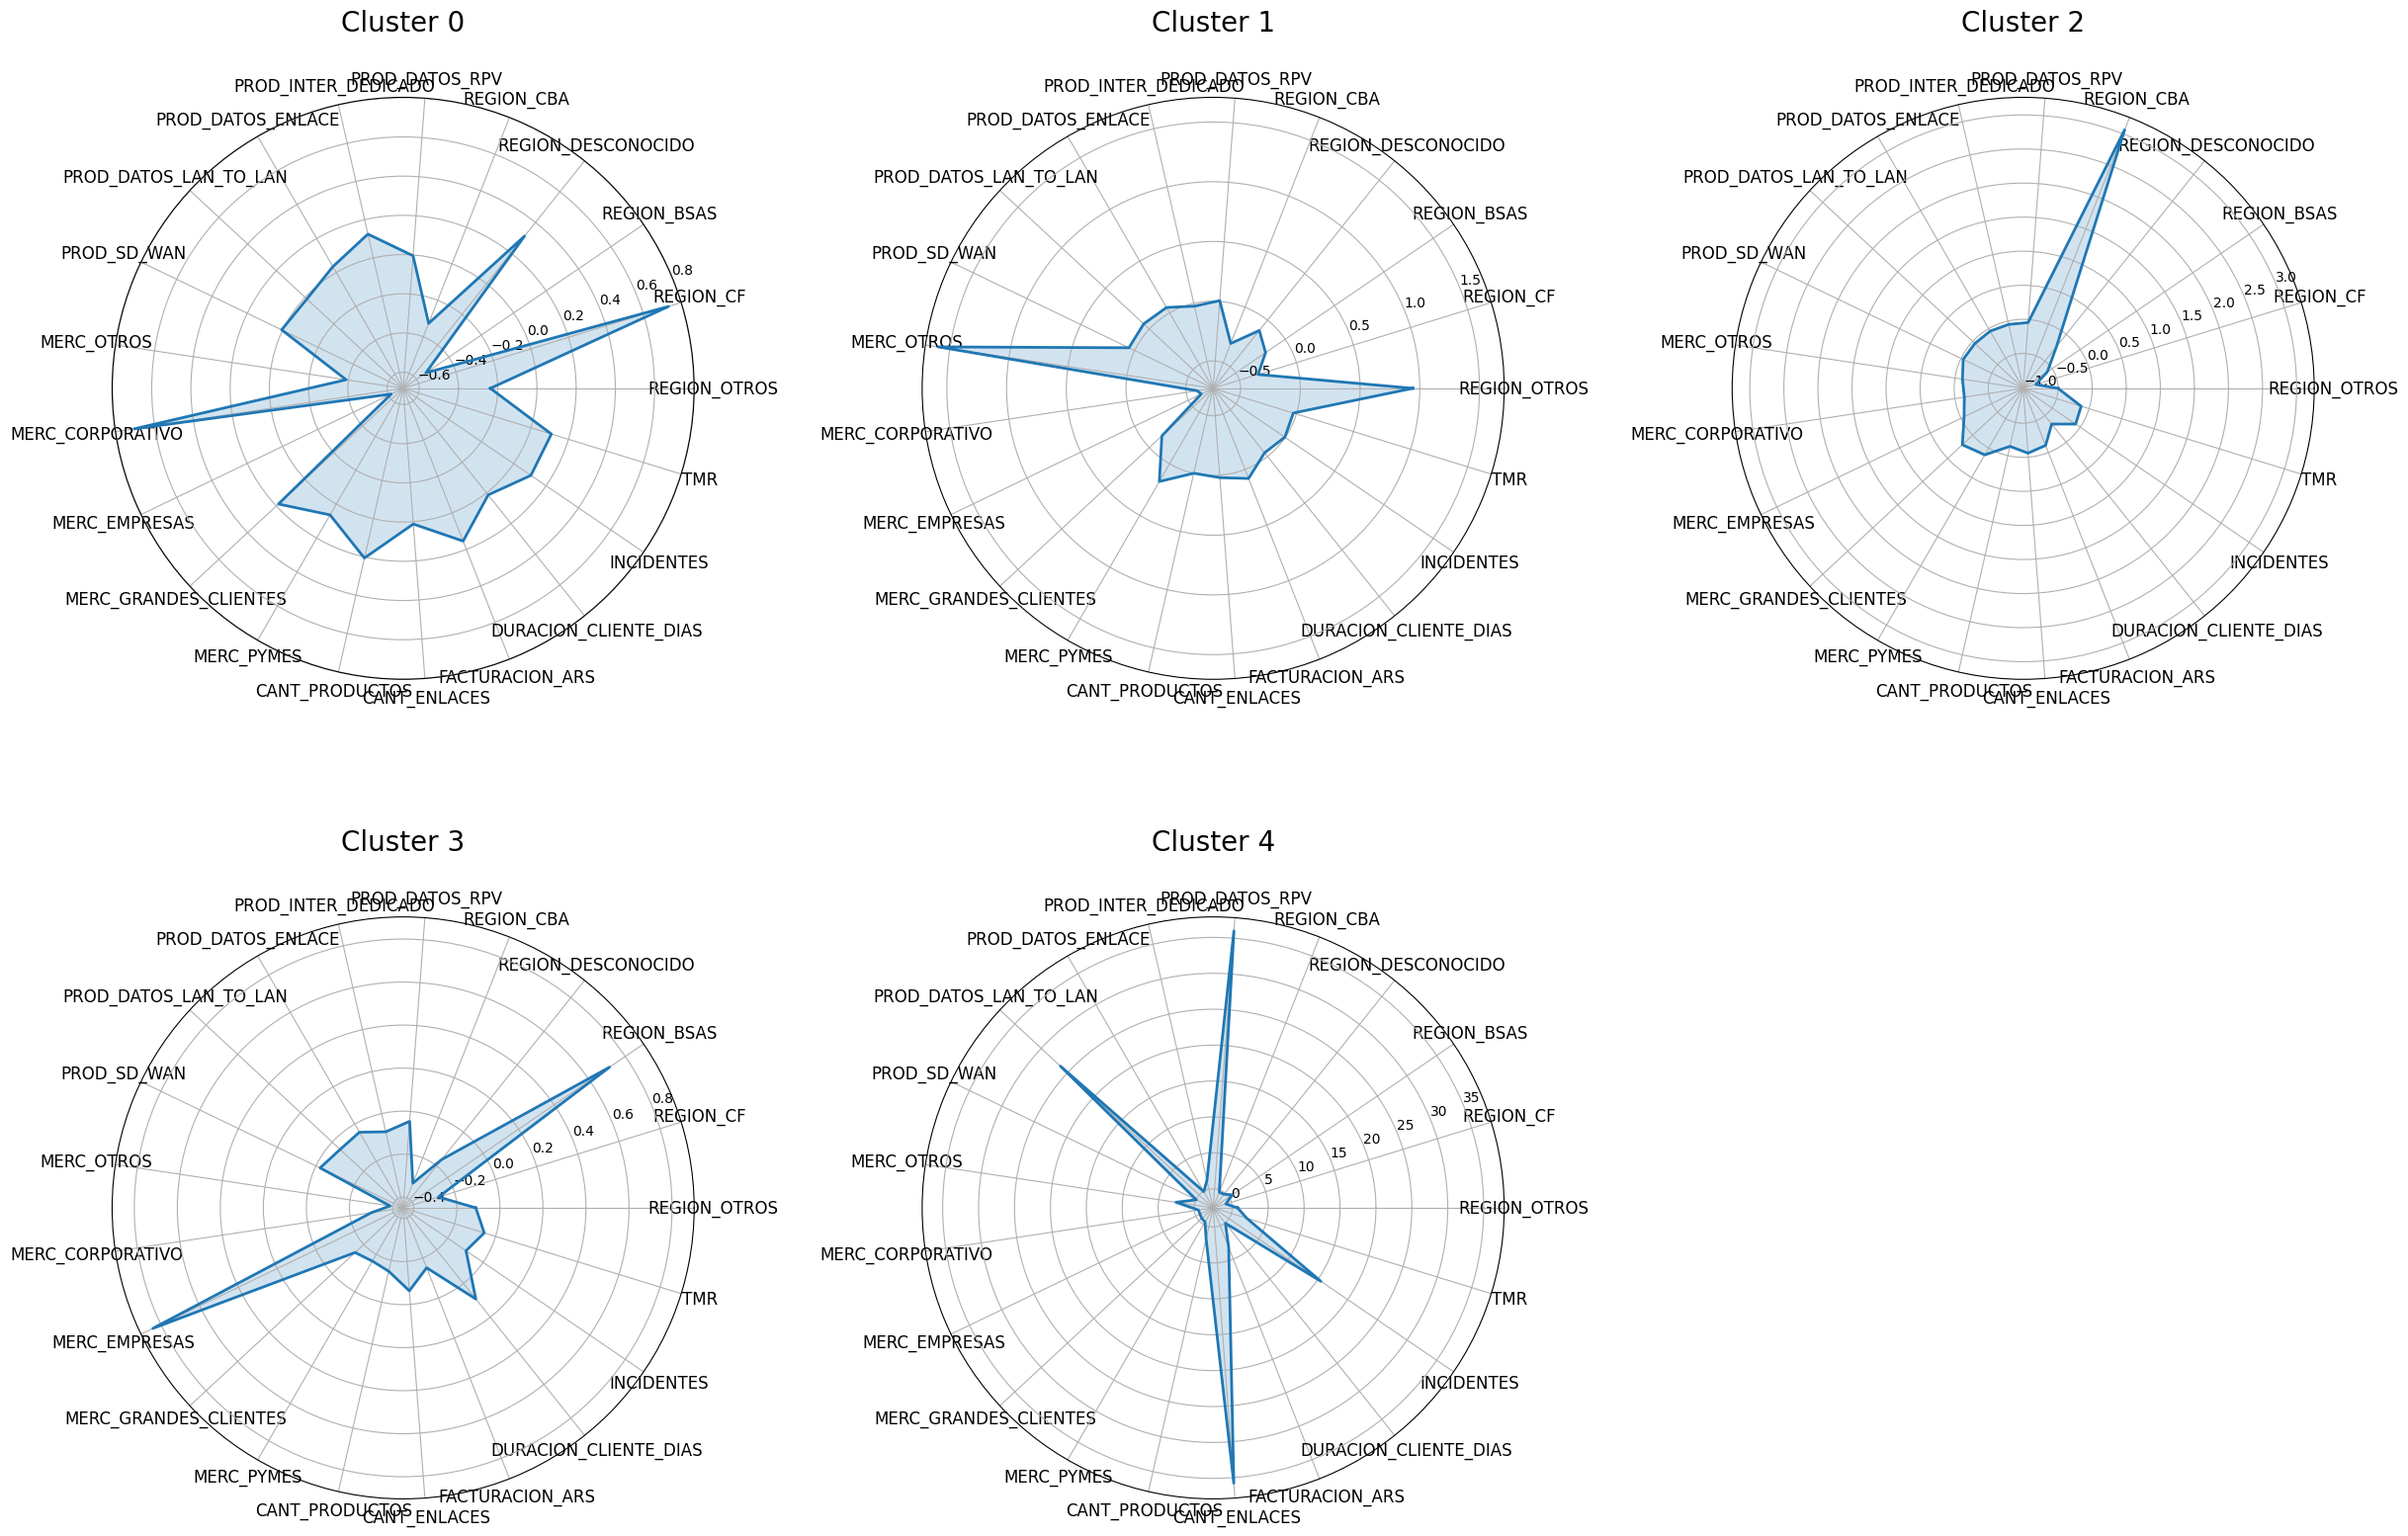

In [35]:
#Gráfico Radar por cluster
# Preparamos los datos para el radar plot
num_clusters = df_escalado_kmeans_pca_medias['Cluster'].nunique()  # Número de clusters
variables = df_escalado_kmeans_pca_medias.columns[1:]  # Excluyendo la columna 'Cluster'

# Configuración de filas y columnas
num_columns = 3  # Número de gráficos por fila
num_rows = -(-num_clusters // num_columns)  # Calcular el número de filas necesarias

plt.figure(figsize=(25, 17))  # Ajustamos el tamaño de la figura (ancho y alto)

# Configuración de los gráficos
for cluster in range(num_clusters):
    values = df_escalado_kmeans_pca_medias[df_escalado_kmeans_pca_medias['Cluster'] == cluster].iloc[0, 1:].values
    values = list(values) + [values[0]]  # Cerrar el polígono
    angles = [n / float(len(variables)) * 2 * pi for n in range(len(variables))]
    angles += angles[:1]

    # Configuramos el subplot con filas y columnas
    ax = plt.subplot(num_rows, num_columns, cluster + 1, polar=True)  # Ajustar filas y columnas
    plt.xticks(angles[:-1], variables, color='black', size=12)  # Tamaño de letra para etiquetas
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')  # Línea
    ax.fill(angles, values, alpha=0.2)  # Relleno
    plt.title(f'Cluster {cluster}', size=20, color='black', y=1.1)  # Título

# Ajustar el espaciado y mostrar los gráficos
plt.tight_layout(pad=3.0)  # Espaciado entre subplots
plt.show()

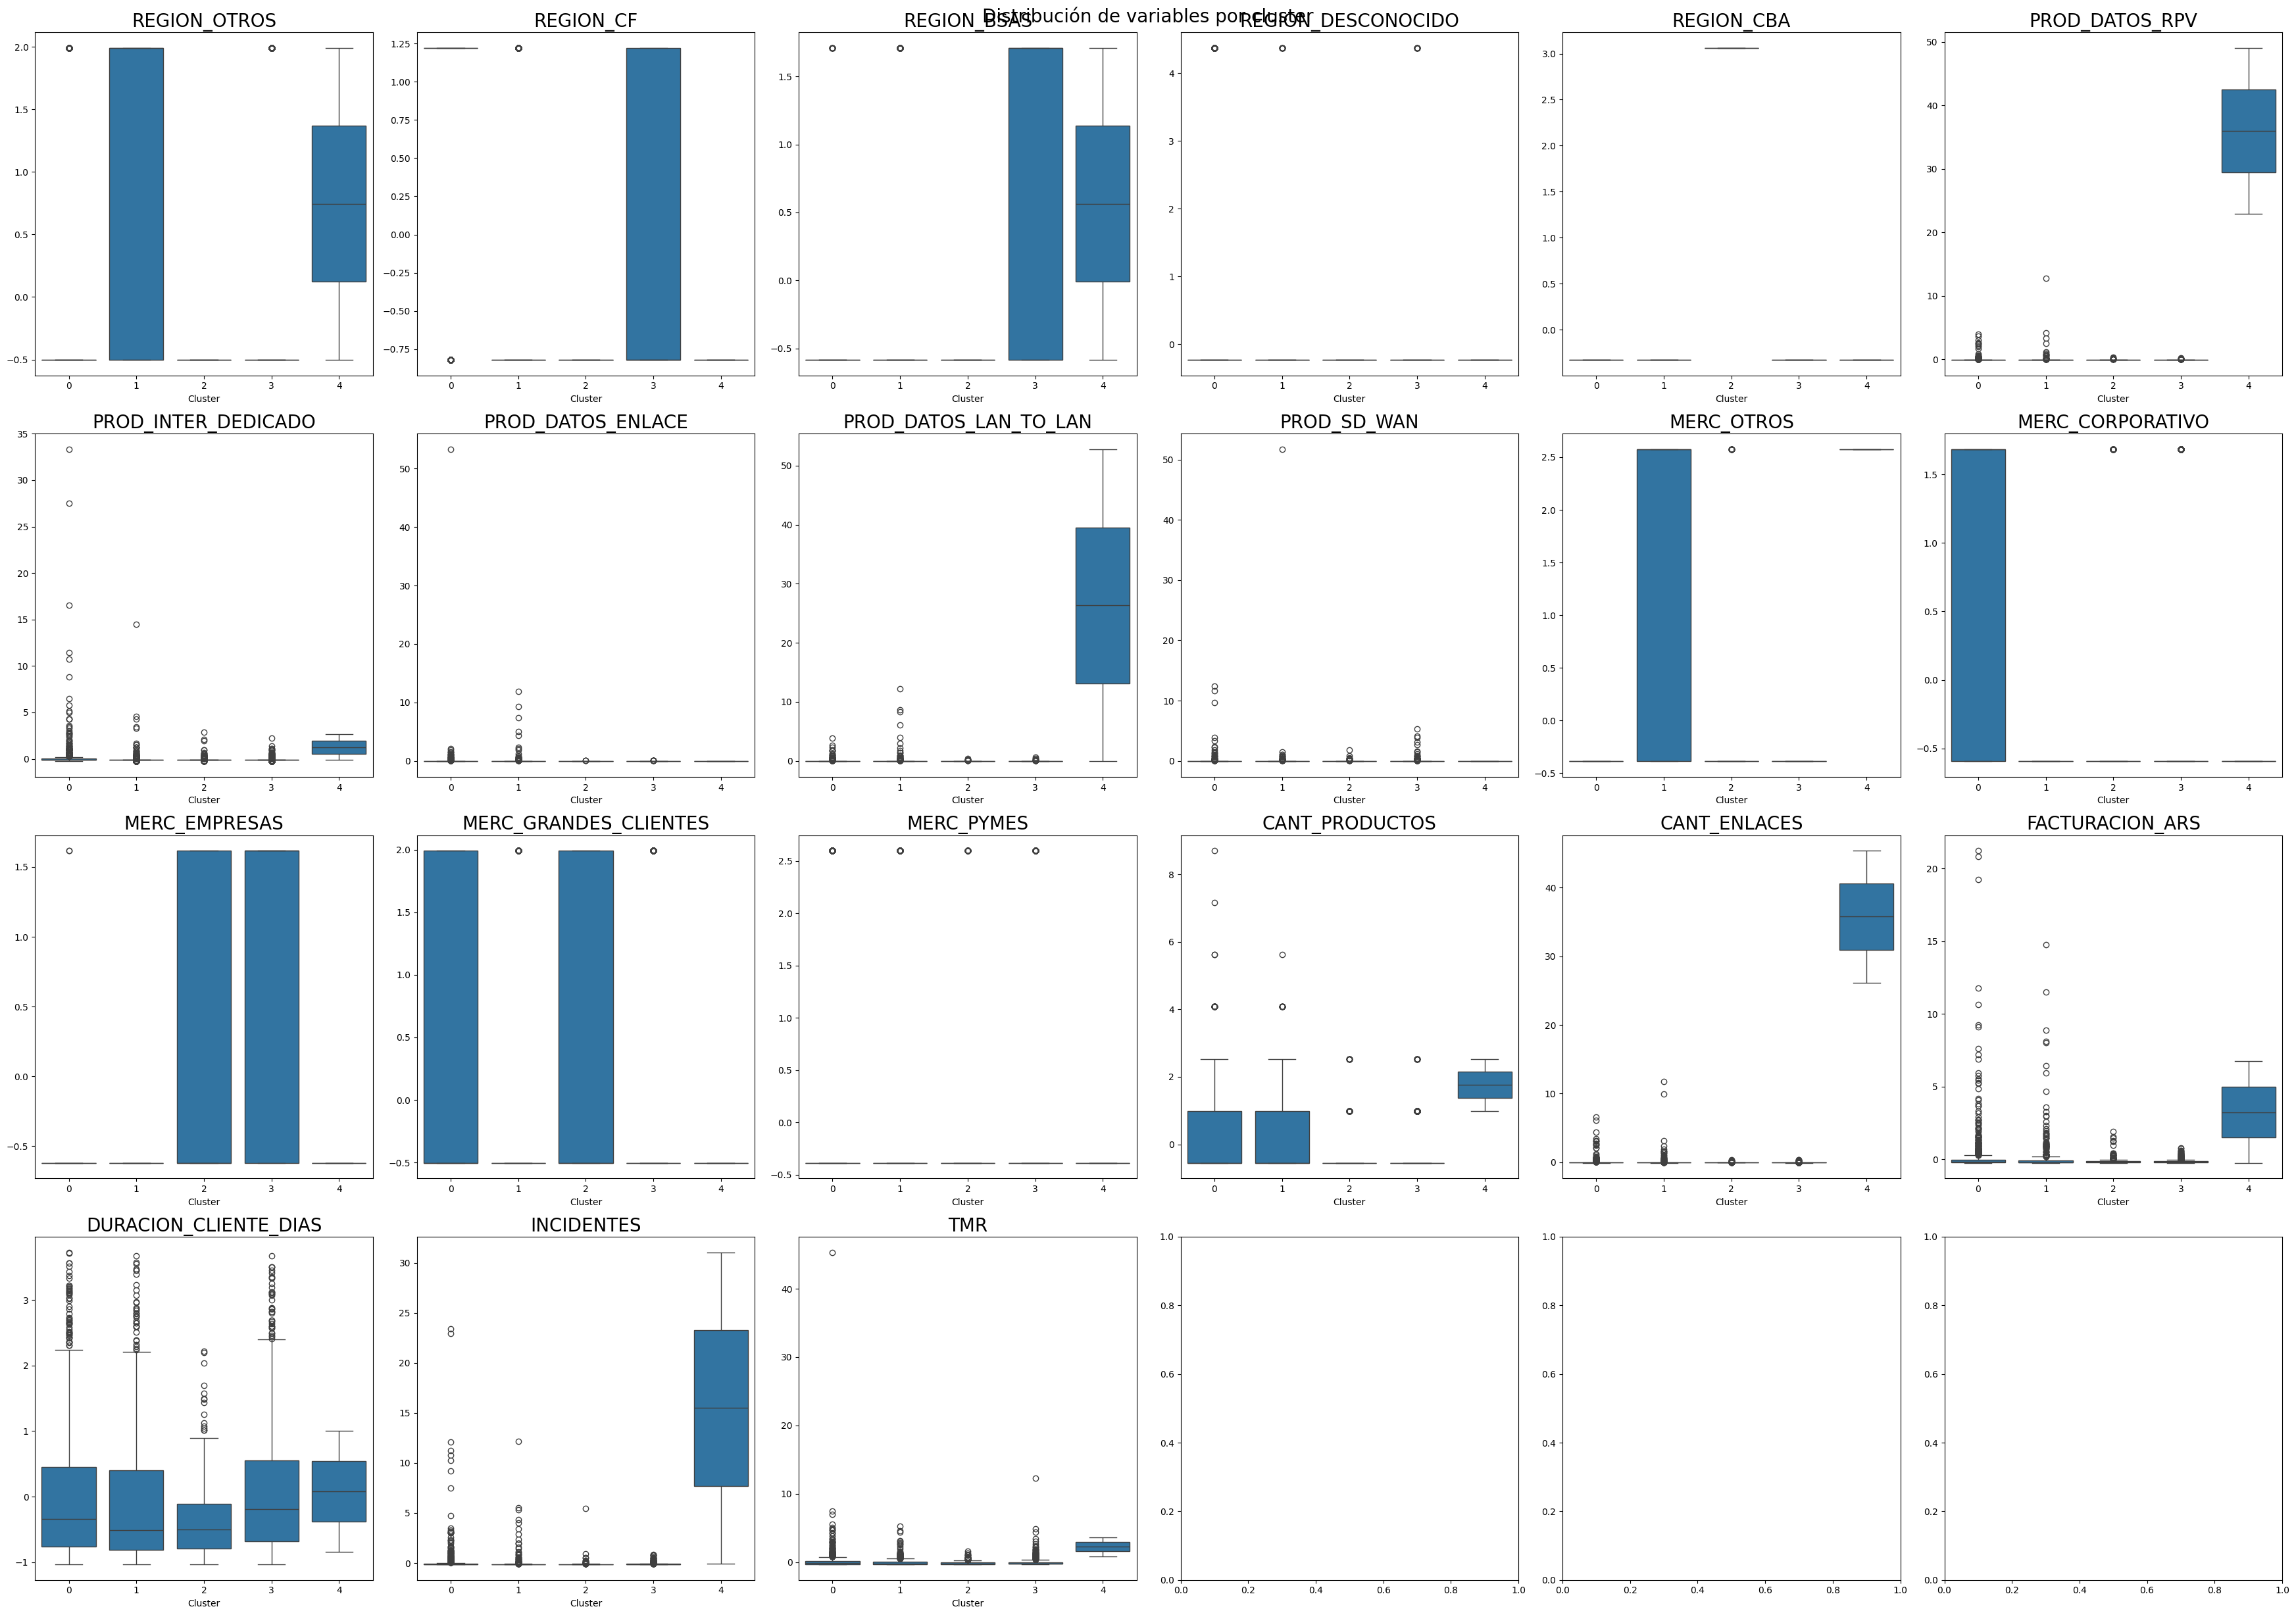

In [36]:
#Boxplot por Cluster
# Definir las dimensiones de la cuadrícula de subplots (ajusta según la cantidad de variables)
filas = 4  # Número de filas en la cuadrícula
columnas = 6  # Número de columnas en la cuadrícula

# Configuración de la figura y tamaño general
fig, axes = plt.subplots(filas, columnas, figsize=(35, 25))
fig.suptitle('Distribución de variables por cluster', fontsize=20)

# Recorrer las variables y crear un boxplot en cada subplot
for i, variable in enumerate(variables_df_escalado):
    fila = i // columnas
    columna = i % columnas
    
    # Crear boxplot en la posición correspondiente
    sns.boxplot(x='Cluster', y=variable, data=df_escalado_kmeans_pca, ax=axes[fila, columna])
    axes[fila, columna].set_title(variable, fontsize=20)
    axes[fila, columna].set_xlabel('Cluster')
    axes[fila, columna].set_ylabel('')

# Ajustar espacio entre subplots para evitar superposición
plt.tight_layout()  # Ajuste para el título general
plt.show()

#### Clustering con DBSCAN sin PCA

Se aplica DBSCAN en el dataset sin PCA. Primero probamos con diferentes valores de hiperparámetros y elegimos el que nos ofrece menor ruido. 


Elección de Parámetros

- Parámetro eps (Epsilon): El parámetro eps define el radio dentro del cual se consideran los puntos vecinos. La elección de eps = 4 se basó en el gráfico de distancias k-vecinos, donde se buscó un "codo". 

- Parámetro min_samples: Fue elegido basado en la densidad esperada de los clusters en tus datos. Este parámetro indica el número mínimo de puntos necesarios para formar un cluster denso. Un valor más alto hace que DBSCAN sea más estricto, requiriendo que los clusters tengan al menos min_samples puntos para ser considerados válidos. Vamos a usar un valor de min_samples=10 para poder identificar clusters con suficiente densidad.

In [37]:
dbscan = DBSCAN(eps=4, min_samples=10)#ponemos los valores que nos parezcan mejores
labels_ = dbscan.fit_predict(df_escalado)
labels_

array([0, 0, 0, ..., 0, 0, 1])

In [38]:
#Agregamos la etiqueta
df_escalado_dbscan=df_escalado.copy()
df_escalado_dbscan['Cluster']=labels_
df_escalado_dbscan['Cluster'].value_counts()

Cluster
 0    3028
 1     154
-1      39
Name: count, dtype: int64

In [39]:
# Verificar cantidad de clusters y ruido
unique_labels = np.unique(labels_)
print(f"Número de clusters: {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
print(f"Puntos de ruido: {list(labels_).count(-1)}")

Número de clusters: 2
Puntos de ruido: 39


In [40]:
# Calcular el coef. de silueta
mask = labels_ != -1
filtered_data = df_escalado[mask]
filtered_labels = labels_[mask]

if len(set(filtered_labels)) > 1:  # Necesita al menos 2 clusters para calcular
    score = silhouette_score(filtered_data, filtered_labels)
    print(f"Silhouette Score: {score:.4f}")
else:
    print("Silhouette Score no es aplicable con un solo cluster.")

Silhouette Score: 0.2807


#### Clustering con DBSCAN con PCA

Se aplica DBSCAN en el dataset con PCA. Primero probamos con diferentes valores de hiperparámetros y elegimos el que nos ofrece menor ruido.

In [42]:
dbscan2_ = DBSCAN(eps=0.5, min_samples=1)
labels2_ = dbscan2_.fit_predict(df_escalado_pca)
labels2_

array([  0,   1,   2, ...,   7, 261,  56])

In [43]:
df_escalado_dbscan_pca=df_escalado_pca.copy()
df_escalado_dbscan_pca['Cluster']=labels2_
df_escalado_dbscan_pca['Cluster'].value_counts()

Cluster
7      326
4      320
8      257
10     235
0      177
19     166
3      134
9      125
11     101
14     100
16      82
44      77
23      74
35      67
1       67
15      60
17      54
40      54
41      45
13      35
34      31
88      23
78      22
30      20
56      19
51      16
5       14
25      10
123      9
29       9
116      8
121      8
28       7
38       6
2        6
80       5
21       5
48       5
49       4
39       4
33       4
266      4
140      4
204      4
231      3
22       3
114      3
84       3
129      3
132      3
92       3
113      3
59       3
381      3
163      2
192      2
109      2
128      2
110      2
62       2
304      2
240      2
308      2
312      2
340      2
359      2
117      2
238      2
26       2
27       2
207      2
159      2
257      2
12       2
67       2
120      2
134      2
149      2
242      2
261      2
241      2
366      2
199      2
131      2
53       2
296      2
376      1
58       1
60       1
61       1
63

In [44]:
# Verificar cantidad de clusters y ruido
unique_labels = np.unique(labels2_)
print(f"Número de clusters: {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
print(f"Puntos de ruido: {list(labels2_).count(-1)}")

Número de clusters: 410
Puntos de ruido: 0


In [45]:
# Calcular el coef. de silueta
mask2 = labels2_ != -1
filtered_data2 = df_escalado[mask2]
filtered_labels2 = labels2_[mask2]

if len(set(filtered_labels2)) > 1:  # Necesita al menos 2 clusters para calcular
    score = silhouette_score(filtered_data2, filtered_labels2)
    print(f"Silhouette Score: {score:.4f}")
else:
    print("Silhouette Score no es aplicable con un solo cluster.")

Silhouette Score: 0.1437


In [ ]:
##se puede hacer PCA de dos componentes para poder graficar los clusters con 2 componentes

### Conclusiones y Observaciones